In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MovieLens1M and Jester
jester = {'LLI': {'MAE': [3.66033864, 2.9802322387695312e-05], 'RMSE': [4.644750118255, 0.003978729248]},\
        'SlopeOne': {'MAE': [3.24346061, 0.00582920], 'RMSE': [4.276264, 0.00594627]},\
        'SVD': {'MAE': [3.33184702, 0.003690941], 'RMSE': [4.42742606, 0.003001447]},\
        'NMF': {'MAE':[3.355650612340057,0.010752853351171082], 'RMSE': [4.374144414, 0.00924872]},\
        'KNNBasic':{'MAE':[3.186790462, 0.0031942866], 'RMSE': [4.374144414, 0.00924872]},\
        'KNNWithMeans':{'MAE':[3.13529441760, 0.005351285412], 'RMSE': [4.185004, 0.0059447]},\
        'KNNWithZScore':{'MAE':[3.1310810,0.0013469225], 'RMSE': [4.1935003600868, 0.0053512854128740985]},\
        'KNNBaseline':{'MAE':[3.118214675392, 0.00062561594], 'RMSE': [4.160602907402,0.00353159385]},\
        'NormalPredictor': {'MAE':[5.880311067, 0.0077080144], 'RMSE' : [7.26971411,0.0080865294]},\
}

ml_1m = {'LLI': {'MAE': [0.7440393269062042, 0.0009473264217376709], 'RMSE': [0.9340194165706635, 0.00020560622215270996]},\
        'SlopeOne': {'MAE': [0.7162062286177, 0.00046123449286989023], 'RMSE': [0.9082294888547588, 0.0004939931702374945]},\
        'SVD': {'MAE': [0.6961877998544651, 0.0009211154026132371], 'RMSE': [0.8856978353606525, 0.001187294716554586]},\
        'NMF': {'MAE':[0.8121980198380494, 0.06803363663186758], 'RMSE' : [1.054514096199889, 0.10570039677609855]},\
        'KNNBasic':{'MAE':[0.7897773236286172, 0.0006578187489354635], 'RMSE': [1.0092654191863446, 0.0006977068883130683]},\
        'KNNWithMeans':{'MAE':[0.7104406717158778, 0.0005473837100530133], 'RMSE': [0.9043761667961429, 0.0011609268080959505]},\
        'KNNWithZScore':{'MAE':[0.7100513341196754, 0.0012320620910324896], 'RMSE': [0.9057406195724796, 0.0015431355450819461]},\
        'KNNBaseline':{'MAE':[0.7123275216510949, 0.0005397593326109994], 'RMSE': [0.9056859793736022, 0.000606549912372103]},\
        'NormalPredictor': {'MAE':[1.2067523182328526, 7.888168996591403e-05], 'RMSE': [1.505686395630935, 0.00021683470333301992]},\
}

In [3]:
def get_MAE_RMSE(data):
    MAE_mean = {}
    MAE_std = {}
    RMSE_mean = {}
    RMSE_std = {}
    for key, value in data.items():
        MAE_mean[key] = round(value['MAE'][0], 5)
        MAE_std[key] = round(value['MAE'][1], 5)
        RMSE_mean[key] = round(value['RMSE'][0], 5)
        RMSE_std[key] = round(value['RMSE'][1], 5) 
    MAE = [MAE_mean, MAE_std]
    RMSE = [RMSE_mean, RMSE_std]
    return MAE, RMSE

In [4]:
MAE_jester, RMSE_jester = get_MAE_RMSE(jester) 
MAE_ml_1m, RMSE_ml_1m = get_MAE_RMSE(ml_1m) 
labels = list(jester.keys())
length = len(labels)

In [63]:
def draw(data_1, data_2, labels, length, metric):
    X = range(1,length+1)
    Y1 = list(data_1[0].values())
    Y2 = list(data_2[0].values())
    std1 = list(data_1[1].values())
    std2 = list(data_2[1].values())
    Y1_plus = [a + b for a, b in zip(Y1, std1)]
    Y1_minus = [a - b for a, b in zip(Y1, std1)]
    Y2_plus = [a + b for a, b in zip(Y2, std2)]
    Y2_minus = [a - b for a, b in zip(Y2, std2)]
    
    df = pd.DataFrame(zip(x*3, ["y"]*3+["z"]*3+["k"]*3, y+z+k), columns=["time", "kind", "data"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="time", hue="kind", y="data", data=df)
    
    fig = plt.figure(figsize=(9, 8), dpi=80)
    ax = fig.add_subplot(111)
    
    # mean and std
#     plt.boxplot(Y1, labels = X, 'Jester-2', linestyle = 'None',)
#     plt.boxplot([X, Y2, label = 'MovieLens-1M', linestyle = 'None',)
#     plt.fill_between(X, Y1_plus, Y1_minus, color='#ffcd3c', alpha=0.5, linestyle = 'None',)
#     plt.fill_between(X, Y2_plus, Y2_minus, color='#ffcd3c', alpha=0.5, linestyle = 'None',)
    plt.errorbar(X, Y1, yerr = std1,fmt='o',ecolor = 'green',color='green', label = 'Jester2')
    plt.errorbar(X, Y2, yerr = std2,fmt='o',ecolor = 'green',color='green', label = 'MovieLens-1M')
    plt.bar(X, Y1, color='blue',  label = 'Jester-2', linestyle = 'None',)
    plt.bar(X, Y2, color='red',label = 'MovieLens-1M', linestyle = 'None',)
    plt.xticks(X, labels, rotation=45, ha="right", fontsize = 20)
    plt.legend(loc='upper left', shadow=True, fontsize=20)
    plt.ylabel(metric, fontsize=30)
    plt.yticks(fontsize = 20)
    plt.savefig(fname = f"{metric}_plot_2_dim", bbox_inches='tight')
    plt.show()

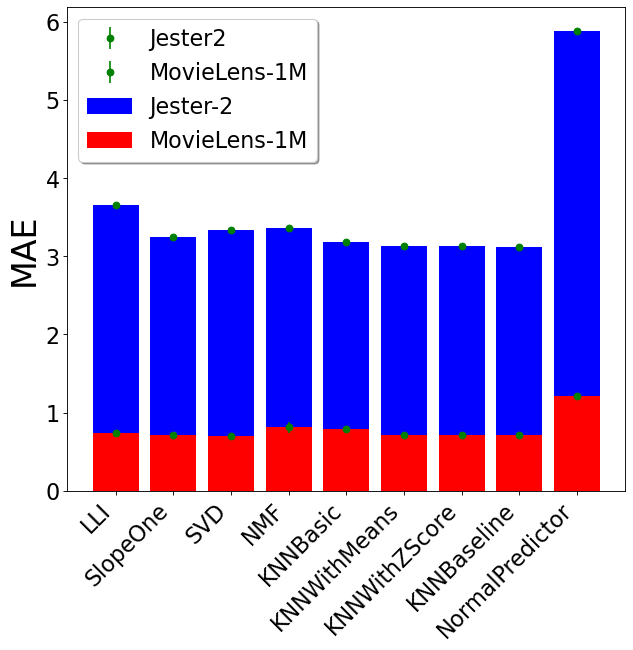

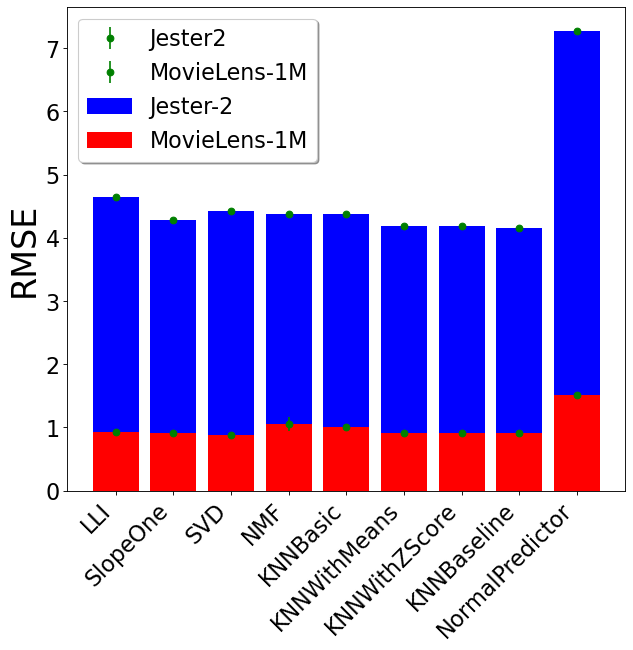

In [64]:
draw(MAE_jester, MAE_ml_1m, labels, length, "MAE")
draw(RMSE_jester, RMSE_ml_1m, labels, length, "RMSE")

In [135]:
y_val = list(arr.values())
X = range(1,len(arr)+1)
plt.figure(figsize=(9, 8), dpi=80)
Y1 = [y[0] for y in y_val]
Y2 = [y[1] for y in y_val]
plt.xticks(X, list(arr.keys()), rotation=45, ha="right")
plt.plot(X, Y1, marker="o")
plt.plot(X, Y2, marker="o")
for x,y1, y2 in zip(X, Y1, Y2):
    label = "{:.2f}".format(y1)
    plt.annotate(label, (x, y1), ha='center', xytext=(0,10), textcoords="offset points")
    label = "{:.2f}".format(y2)
    plt.annotate(label, (x, y2), ha='center', xytext=(0,10), textcoords="offset points")
plt.show()

NameError: name 'arr' is not defined